In [1]:
import pandas as pd

In [2]:
forests = pd.read_csv('forestfires.csv')

In [3]:
forests.head()

,X,Y,month,day,temp,wind,rain,area
0,7,5,mar,fri,8.2,6.7,0.0,NaN
1,7,4,oct,tue,18.0,0.9,0.0,NaN
2,7,4,oct,sat,14.6,1.3,0.0,NaN
3,8,6,mar,fri,8.3,4.0,0.2,NaN
4,8,6,mar,sun,11.4,1.8,0.0,NaN


In [4]:
forests.describe()

,X,Y,temp,wind,rain,area
count,517.000000,517.000000,515.000000,516.000000,517.000000,379.000000
mean,4.669246,4.299807,18.904272,4.019380,0.021663,17.525198
std,2.313778,1.229900,5.801947,1.792934,0.295959,73.818628
min,1.000000,2.000000,2.200000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,15.550000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,19.300000,4.000000,0.000000,2.570000
75%,7.000000,5.000000,22.800000,4.900000,0.000000,9.985000
max,9.000000,9.000000,33.300000,9.400000,6.400000,1090.840000


In [5]:
forests.shape

(517, 8)

In [6]:
forests.isna().sum()
#quite a lot of missing data in area

X          0
Y          0
month      0
day        0
temp       2
wind       1
rain       0
area     138
dtype: int64

In [7]:
forests.fillna({
    'area': 0
}, inplace = True)

forests

,X,Y,month,day,temp,wind,rain,area
0,7,5,mar,fri,8.2,6.7,0.0,0.00
1,7,4,oct,tue,18.0,0.9,0.0,0.00
2,7,4,oct,sat,14.6,1.3,0.0,0.00
3,8,6,mar,fri,8.3,4.0,0.2,0.00
4,8,6,mar,sun,11.4,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,27.8,2.7,0.0,6.44
513,2,4,aug,sun,21.9,5.8,0.0,54.29
514,7,4,aug,sun,21.2,6.7,0.0,11.16
515,1,4,aug,sat,25.6,4.0,0.0,0.00


In [8]:
forests.dropna(inplace = True)

In [9]:
forests.isna().sum()

X        0
Y        0
month    0
day      0
temp     0
wind     0
rain     0
area     0
dtype: int64

In [10]:
forests = forests.loc[:,['temp', 'wind', 'rain', 'area', 'month', 'day']].copy()
forests

,temp,wind,rain,area,month,day
0,8.2,6.7,0.0,0.00,mar,fri
1,18.0,0.9,0.0,0.00,oct,tue
2,14.6,1.3,0.0,0.00,oct,sat
3,8.3,4.0,0.2,0.00,mar,fri
4,11.4,1.8,0.0,0.00,mar,sun
...,...,...,...,...,...,...
512,27.8,2.7,0.0,6.44,aug,sun
513,21.9,5.8,0.0,54.29,aug,sun
514,21.2,6.7,0.0,11.16,aug,sun
515,25.6,4.0,0.0,0.00,aug,sat


In [11]:
forests.sort_values('area', ascending = False, inplace=True)
forests

,temp,wind,rain,area,month,day
238,25.1,4.0,0.0,1090.84,sep,sat
415,27.5,4.9,0.0,746.28,aug,thu
479,22.6,4.9,0.0,278.53,jul,mon
237,18.8,2.2,0.0,212.88,sep,tue
236,18.2,1.8,0.0,200.94,sep,sat
...,...,...,...,...,...,...
117,15.2,4.9,0.0,0.00,mar,sat
116,11.6,6.3,0.0,0.00,mar,sat
115,15.5,6.3,0.0,0.00,mar,tue
114,15.8,7.6,0.0,0.00,mar,tue


In [12]:
forests.loc[forests['area']==0]

,temp,wind,rain,area,month,day
483,31.0,5.4,0.0,0.0,aug,sun
357,15.9,3.6,0.0,0.0,sep,fri
481,30.2,4.9,0.0,0.0,jul,thu
358,19.7,2.7,0.0,0.0,sep,fri
347,10.1,3.6,0.0,0.0,sep,fri
...,...,...,...,...,...,...
117,15.2,4.9,0.0,0.0,mar,sat
116,11.6,6.3,0.0,0.0,mar,sat
115,15.5,6.3,0.0,0.0,mar,tue
114,15.8,7.6,0.0,0.0,mar,tue


In [14]:
import numpy as np

In [15]:
forests['is_rain'] = np.where(forests['rain'] > 0, True, False)

In [16]:
forests

,temp,wind,rain,area,month,day,is_rain
238,25.1,4.0,0.0,1090.84,sep,sat,False
415,27.5,4.9,0.0,746.28,aug,thu,False
479,22.6,4.9,0.0,278.53,jul,mon,False
237,18.8,2.2,0.0,212.88,sep,tue,False
236,18.2,1.8,0.0,200.94,sep,sat,False
...,...,...,...,...,...,...,...
117,15.2,4.9,0.0,0.00,mar,sat,False
116,11.6,6.3,0.0,0.00,mar,sat,False
115,15.5,6.3,0.0,0.00,mar,tue,False
114,15.8,7.6,0.0,0.00,mar,tue,False


In [21]:
forests.groupby('month')['area'].mean()

month
apr    10.002500
aug    12.622582
dec    13.330000
feb     6.275000
jan     0.000000
jul    14.369687
jun     5.841176
mar     4.356667
may    19.240000
nov     0.000000
oct     6.638000
sep    17.942616
Name: area, dtype: float64

In [22]:
forests.groupby('day')['area'].mean()

day
fri     5.261647
mon     9.547703
sat    25.841687
sun    10.104526
thu    16.345902
tue    12.822063
wed    10.904151
Name: area, dtype: float64

In [23]:
forests.groupby('is_rain')['area'].mean()

is_rain
False    13.073728
True      1.855714
Name: area, dtype: float64

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([505.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 10 Patch objects>)

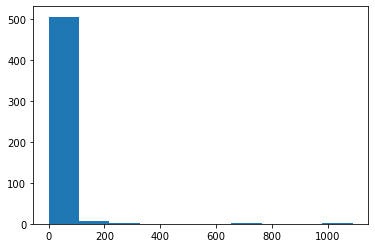

In [28]:
plt.hist(x = 'area', data = forests)

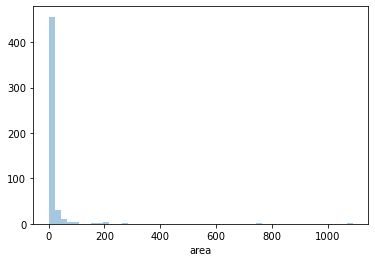

In [32]:
sns.distplot(forests['area'], kde = False)

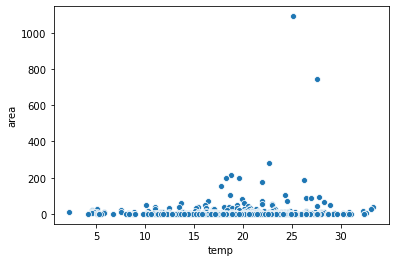

In [33]:
sns.scatterplot(x = 'temp', y = 'area', data = forests)